In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.The citipy module finds the nearest city to 
# the latitude and longitude pair with a population of 500 or more.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations. lats = lattitudes, lngs =  longitudes. zip saves it as a zip
# object which pachs each pair of lats and lngs having the same index in their respective array into a tuple.  If there are
# 1,500 lats and lngs, there will be 1,500 tuples of paired lats and lngs, where each lats and lngs in a tuple can be
# accessed by the index of 0 and 1, respectively. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

# Some of this code should look familiar, but let's break it down:

# We create a cities list to store city names.
# We iterate through the coordinates, as in our practice, and retrieve the nearest city using the lats and longs pair.
# We add a decision statement with the logical operator not in to determine whether the found city is already in the cities
# list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and 
# longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the 
# unique cities.

600

In [5]:
# For each city in our lats_lngs list, we need to retrieve the following data and add it to a DataFrame:

    # City, country, and date
    # Latitude and longitude
    # Maximum temperature
    # Humidity
    # Cloudiness
    # Wind speed

# Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.

# We will need to do the following:

# import our dependencies and initialize counters and an empty list that will hold the weather data. Dependencies will be added above
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

# First create teh basic URL for the OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list. This creates the URL for each one and groups our records in sets of 50.
# enumerate can be used instead of creating to for loops
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Let's break down the code so we understand fully before continuing:

    # We create the for loop with the enumerate() method and reference the index and the city in the list.
    # In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index 
    # is greater than or equal to 50. If the statement is true, then the set_count and the record_count are incremented by 1.
    # Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the 
    # blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will find the 
    # corresponding weather data for the city instead of finding the weather data for the first part of the city name.
    # Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
    # Then we add one to the record count before the next city is processed.
    
# Run an API request for each of the cities. If there is not data for the city, i.e., a response 404 then there is not 
# weather to retrieve and city not found. skipping is printed. Pass is a general purpose statem to handle errors and 
# allow the program to continue. Usually we dont want to use this and instead add another try block to print the error. 

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                    "Lat": city_lat,
                    "Lng": city_lng,
                    "Max Temp": city_max_temp,
                    "Humidity": city_humidity,
                    "Cloudiness": city_clouds,
                    "Wind Speed": city_wind,
                    "Country": city_country,
                    "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chato
Processing Record 2 of Set 1 | bonavista
Processing Record 3 of Set 1 | alofi
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | tabuk
Processing Record 6 of Set 1 | dali
Processing Record 7 of Set 1 | uarini
Processing Record 8 of Set 1 | zhangjiakou
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | asosa
Processing Record 11 of Set 1 | narsaq
Processing Record 12 of Set 1 | sokoto
Processing Record 13 of Set 1 | padang
Processing Record 14 of Set 1 | lolua
City not found. Skipping...
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | januaria
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | amderma
City not found. Skipping...
Processing Record 21 of Set 1 | brae
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of Se

Processing Record 184 of Set 4 | launceston
Processing Record 185 of Set 4 | dingle
Processing Record 186 of Set 4 | college
Processing Record 187 of Set 4 | codrington
Processing Record 188 of Set 4 | illapel
Processing Record 189 of Set 4 | richards bay
Processing Record 190 of Set 4 | port-gentil
Processing Record 191 of Set 4 | coihaique
Processing Record 192 of Set 4 | ketchikan
Processing Record 193 of Set 4 | kavaratti
Processing Record 194 of Set 4 | svobodnyy
Processing Record 195 of Set 4 | suzun
Processing Record 196 of Set 4 | fort nelson
Processing Record 197 of Set 4 | hami
Processing Record 198 of Set 4 | mount isa
Processing Record 199 of Set 4 | kautokeino
Processing Record 200 of Set 4 | cootamundra
Processing Record 201 of Set 5 | delijan
Processing Record 202 of Set 5 | port moresby
Processing Record 203 of Set 5 | labutta
City not found. Skipping...
Processing Record 204 of Set 5 | altamont
Processing Record 205 of Set 5 | vohibinany
Processing Record 206 of Set 5 

Processing Record 370 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 371 of Set 8 | zonguldak
Processing Record 372 of Set 8 | longyearbyen
Processing Record 373 of Set 8 | tobane
Processing Record 374 of Set 8 | sibolga
Processing Record 375 of Set 8 | burica
City not found. Skipping...
Processing Record 376 of Set 8 | wagar
Processing Record 377 of Set 8 | tuatapere
Processing Record 378 of Set 8 | saleaula
City not found. Skipping...
Processing Record 379 of Set 8 | poum
Processing Record 380 of Set 8 | pontian kecil
Processing Record 381 of Set 8 | ranau
Processing Record 382 of Set 8 | jiuquan
Processing Record 383 of Set 8 | dunedin
Processing Record 384 of Set 8 | sao filipe
Processing Record 385 of Set 8 | san rafael del sur
Processing Record 386 of Set 8 | naron
Processing Record 387 of Set 8 | bom despacho
Processing Record 388 of Set 8 | shuangcheng
Processing Record 389 of Set 8 | puerto leguizamo
Processing Record 390 of Set 8 | kijang
Processing Record 

Processing Record 550 of Set 11 | honningsvag
Processing Record 551 of Set 12 | haradok
Processing Record 552 of Set 12 | ginir
Processing Record 553 of Set 12 | evensk
Processing Record 554 of Set 12 | gizo
Processing Record 555 of Set 12 | qaqortoq
Processing Record 556 of Set 12 | ola
Processing Record 557 of Set 12 | muisne
Processing Record 558 of Set 12 | warqla
City not found. Skipping...
Processing Record 559 of Set 12 | lohja
Processing Record 560 of Set 12 | tessalit
Processing Record 561 of Set 12 | dubenskiy
City not found. Skipping...
Processing Record 562 of Set 12 | alepe
Processing Record 563 of Set 12 | zhigansk
Processing Record 564 of Set 12 | magadan
Processing Record 565 of Set 12 | tautira
Processing Record 566 of Set 12 | bayamo
Processing Record 567 of Set 12 | mega
Processing Record 568 of Set 12 | mitsamiouli
Processing Record 569 of Set 12 | krasnyy chikoy
Processing Record 570 of Set 12 | long
Processing Record 571 of Set 12 | saryg-sep
Processing Record 572

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chato,-2.6378,31.7669,70.99,60,66,1.70,TZ,2021-08-04 00:08:48
1,Bonavista,48.6499,-53.1147,65.12,76,72,12.33,CA,2021-08-04 00:08:49
2,Alofi,-19.0595,-169.9187,74.05,60,61,12.41,NU,2021-08-04 00:08:49
3,Castro,-24.7911,-50.0119,45.64,88,42,4.29,BR,2021-08-04 00:08:49
4,Tabuk,17.4189,121.4443,80.58,78,100,1.32,PH,2021-08-04 00:08:50
5,Dali,25.7000,100.1833,65.35,80,1,2.13,CN,2021-08-04 00:08:50
6,Uarini,-2.9900,-65.1083,75.24,79,67,2.46,BR,2021-08-04 00:08:50
7,Zhangjiakou,40.8100,114.8794,69.53,86,35,2.17,CN,2021-08-04 00:08:51
8,Chokurdakh,70.6333,147.9167,52.79,38,25,9.73,RU,2021-08-04 00:08:51
9,Asosa,10.0667,34.5333,60.94,87,100,3.60,ET,2021-08-04 00:08:51


In [8]:
# Change the column order
new_column_order  = ['City','Country','Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed',]

# Assign district summary df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chato,TZ,2021-08-04 00:08:48,-2.6378,31.7669,70.99,60,66,1.70
1,Bonavista,CA,2021-08-04 00:08:49,48.6499,-53.1147,65.12,76,72,12.33
2,Alofi,NU,2021-08-04 00:08:49,-19.0595,-169.9187,74.05,60,61,12.41
3,Castro,BR,2021-08-04 00:08:49,-24.7911,-50.0119,45.64,88,42,4.29
4,Tabuk,PH,2021-08-04 00:08:50,17.4189,121.4443,80.58,78,100,1.32
5,Dali,CN,2021-08-04 00:08:50,25.7000,100.1833,65.35,80,1,2.13
6,Uarini,BR,2021-08-04 00:08:50,-2.9900,-65.1083,75.24,79,67,2.46
7,Zhangjiakou,CN,2021-08-04 00:08:51,40.8100,114.8794,69.53,86,35,2.17
8,Chokurdakh,RU,2021-08-04 00:08:51,70.6333,147.9167,52.79,38,25,9.73
9,Asosa,ET,2021-08-04 00:08:51,10.0667,34.5333,60.94,87,100,3.60


In [9]:
#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'cities.csv',)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chato,TZ,2021-08-04 00:08:48,-2.6378,31.7669,70.99,60,66,1.70
1,Bonavista,CA,2021-08-04 00:08:49,48.6499,-53.1147,65.12,76,72,12.33
2,Alofi,NU,2021-08-04 00:08:49,-19.0595,-169.9187,74.05,60,61,12.41
3,Castro,BR,2021-08-04 00:08:49,-24.7911,-50.0119,45.64,88,42,4.29
4,Tabuk,PH,2021-08-04 00:08:50,17.4189,121.4443,80.58,78,100,1.32


In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

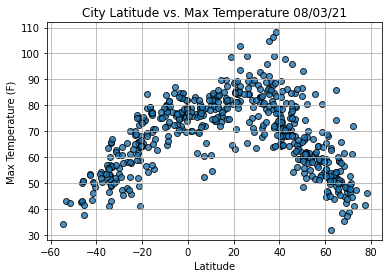

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

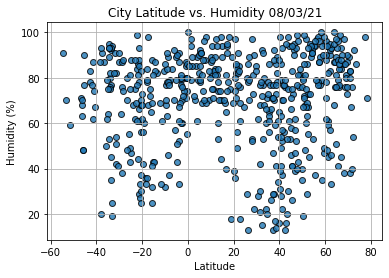

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

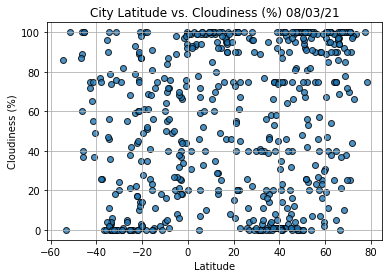

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

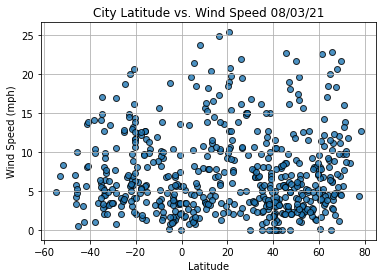

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linear regression from the SciPy stats module. We need to do this to run linear regression.
from scipy.stats import linregress

In [16]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [17]:
# you can use the linregress function to calculate slope, y-intercept, correlation coefficient (r-value), p-value
# and standard deviation

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

# Slope of the regression line as slope
# y-intercept as intercept
# Correlation coefficient as r_value
# p-value as p_value
# Standard error as std_err

# In statistics, the p-value is used to determine significance of results. In most cases, data scientists like to use a 
# significance level of 0.05, which means:

# A linear regression with a p-value > 0.05 is not statistically significant.

# A linear regression with a p-value < 0.05 is statistically significant.

# P-values can also be used to justify rejecting a null hypothesis. 

y = -0.45x + 92.94
The p-value is: 0.011


In [18]:
# Calculate the ideal temperatures (y-values) using the slope and intercept from the equation of the regression line.

# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

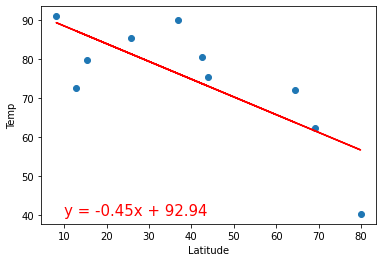

In [19]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()


# Let's review what this code does:

# We plot the latitudes and temperatures on a scatter plot.
# We create a line plot of our regression line with the ideal temperatures.
# We annotate the line plot by adding the equation of our regression line, where the x-axis is 10 and the y-axis is 40, 
# and specify the font and color.
# We create x- and y-axes labels.

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create the hemisphere dataframes
# To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method 
# accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get 
# a specific row from a current DataFrame is row = df.loc[row_index].

index13 = city_data_df.loc[13]
index13

City                       Hobart
Country                        AU
Date          2021-08-04 00:07:56
Lat                      -42.8794
Lng                      147.3294
Max Temp                    53.26
Humidity                       78
Cloudiness                     75
Wind Speed                    3.0
Name: 13, dtype: object

In [22]:
# We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere 
# latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the 
# code city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these 
# criteria.

city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
545     True
546     True
547     True
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [23]:
# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can
# use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional 
# filter city_data_df["Lat"] >= 0 so that our statement would appear as:

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

# Also, since this is a DataFrame, we can add the head() method at the end to get the first five rows, not counting the 
# row of column headings

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bonavista,CA,2021-08-04 00:08:49,48.6499,-53.1147,65.12,76,72,12.33
4,Tabuk,PH,2021-08-04 00:08:50,17.4189,121.4443,80.58,78,100,1.32
5,Dali,CN,2021-08-04 00:08:50,25.7000,100.1833,65.35,80,1,2.13
7,Zhangjiakou,CN,2021-08-04 00:08:51,40.8100,114.8794,69.53,86,35,2.17
8,Chokurdakh,RU,2021-08-04 00:08:51,70.6333,147.9167,52.79,38,25,9.73


In [24]:
# Now assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.

# We can take the same approach to get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for 
# latitudes less than 0.

# To create DataFrames for the Northern and Southern Hemispheres' data, add the code to a new cell and run the code.

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Now we can perform linear regression on latitude and maximum temperature from each hemisphere DataFrame.

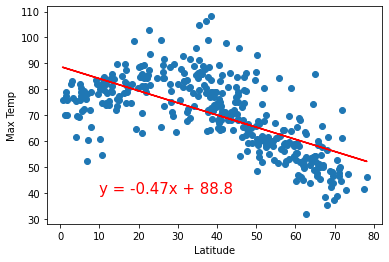

In [25]:
# To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. 
# Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the
# northern_hemi_df DataFrame.

# Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for
# the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot 
# the data.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

# Note: If the equation for the regression line doesn't show up on your graph, you can change the text_coordinates until 
# you see the equation.

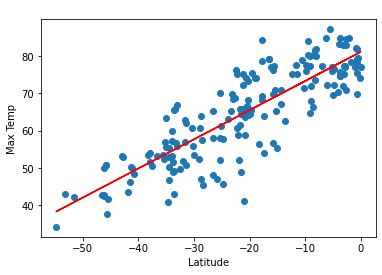

In [26]:
# generate the linear regression on the maximum temperature for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]



# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))




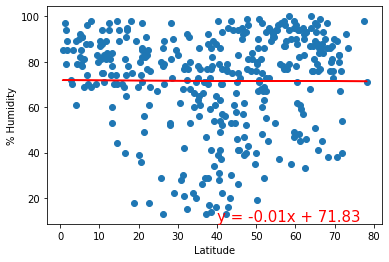

In [27]:
# To perform the linear regression on the percent humidity for the Northern Hemisphere, set the x-value equal to the 
# latitude column and y-value equal to the Humidity column from the northern_hemi_df DataFrame.

# Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates 
# for the percent humidity scatter plot.


# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

# Findings:
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the
# Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to
# changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

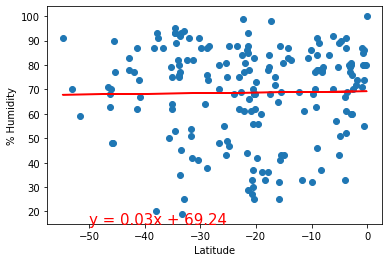

In [28]:
# Linear regression on the Southern Hemisphere 6.4.3 This doesnt even have the formula. Need to learn how to adjust formula positon
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))




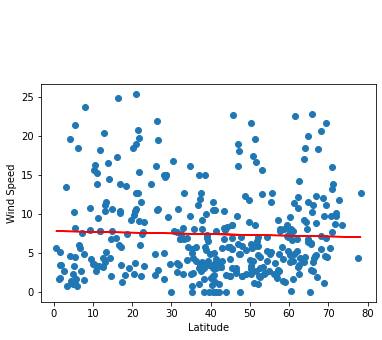

In [30]:
# Perform Linear Regression on the Wind Speed for the Northern Hemisphere
# Call the plot_linear_regression function, with the x-value equal to the Latitude column and the y-value equal to the 
# Wind Speed column from the northern_hemi_df DataFrame. Edit the title, y_label, and text_coordinates for the wind speed 
# scatter plot.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

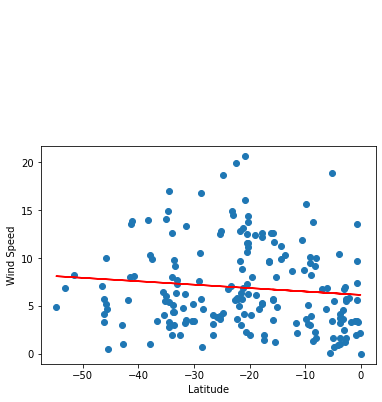

In [32]:
# Perform Linear Regression on the Wind Speed for the Southern Hemisphere
# Finally, let's call the plot_linear_regression function, with the x-value equal to the latitude column and the y-value 
# equal to wind speed column from the southern_hemi_df DataFrame. Edit the title, y_label, and text_coordinates for the
# wind speed scatter plot.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))